In [1]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from ridgeplot import ridgeplot
from scipy import stats
from scipy.stats import ttest_ind
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
from pandas.plotting import parallel_coordinates
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Gebruiker\\Documents\\thesiscode\\experimental\\Pipeline': ['1_2_3_credit.ipynb', '2_3_compas_preprocessing.ipynb', '2_preprocessing_general.ipynb', '3_classification.ipynb', '4_bias_aware_clustering.ipynb', '4_hdbscan_bias_aware.ipynb', '4_synthetic_bias_aware_clustering .ipynb', '5_credit_analysis.ipynb', '5_wine_analysis.ipynb', '6_baselines.ipynb', 'a_hbac_dbscan compas.ipynb', 'a_hbac_dbscan.ipynb', 'a_hbac_kmeans.ipynb', 'a_hbac_kmeans_compas.ipynb', 'a_hbac_meanshift.ipynb', 'a_hbac_meanshift_compas.ipynb', 'a_synt_dbscan.ipynb', 'a_synt_kmeans.ipynb', 'a_synt_meanshift.ipynb', 'errors_feature.ipynb', 'make_plots.ipynb', 'pipeline_theoretical_data.ipynb', 'synthetic_data.ipynb', 'util.py', 'wine_eda_classification.ipynb', '__pycache__']


In [17]:
raw_data = pd.read_csv(r'..\Preprocessed_datasets\Dataset_analysis\credit_kmeans_densplot', index_col=0)
raw_data


,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,predicted_class,true_class,errors,bias
136,27,2,8613,27,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0.0,0.0,remaining
76,34,2,3965,42,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1.0,1.0,remaining
280,23,2,3368,15,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,0.0,remaining
319,27,1,3643,15,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0.0,0.0,remaining
174,26,2,3414,21,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1.0,1.0,discriminated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,27,1,2708,15,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0.0,0.0,remaining
185,31,2,1360,15,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.0,0.0,remaining
41,26,2,1158,12,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0.0,0.0,remaining
108,30,2,7721,24,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0.0,0.0,remaining


In [16]:
discr = raw_data.loc[raw_data['bias']=='discriminated']
len(discr)
rema = raw_data.loc[raw_data['bias']=='remaining']
len(rema)

162

In [15]:
raw_data.columns

# df_plot = raw_data[['Age', 'Job', 'Credit amount', 'Duration','bias']]
# df_plot = raw_data[['Credit amount', 'Duration','bias']]

Index(['Job', 'Credit amount', 'Duration', 'bias'], dtype='object')

1
2
3


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

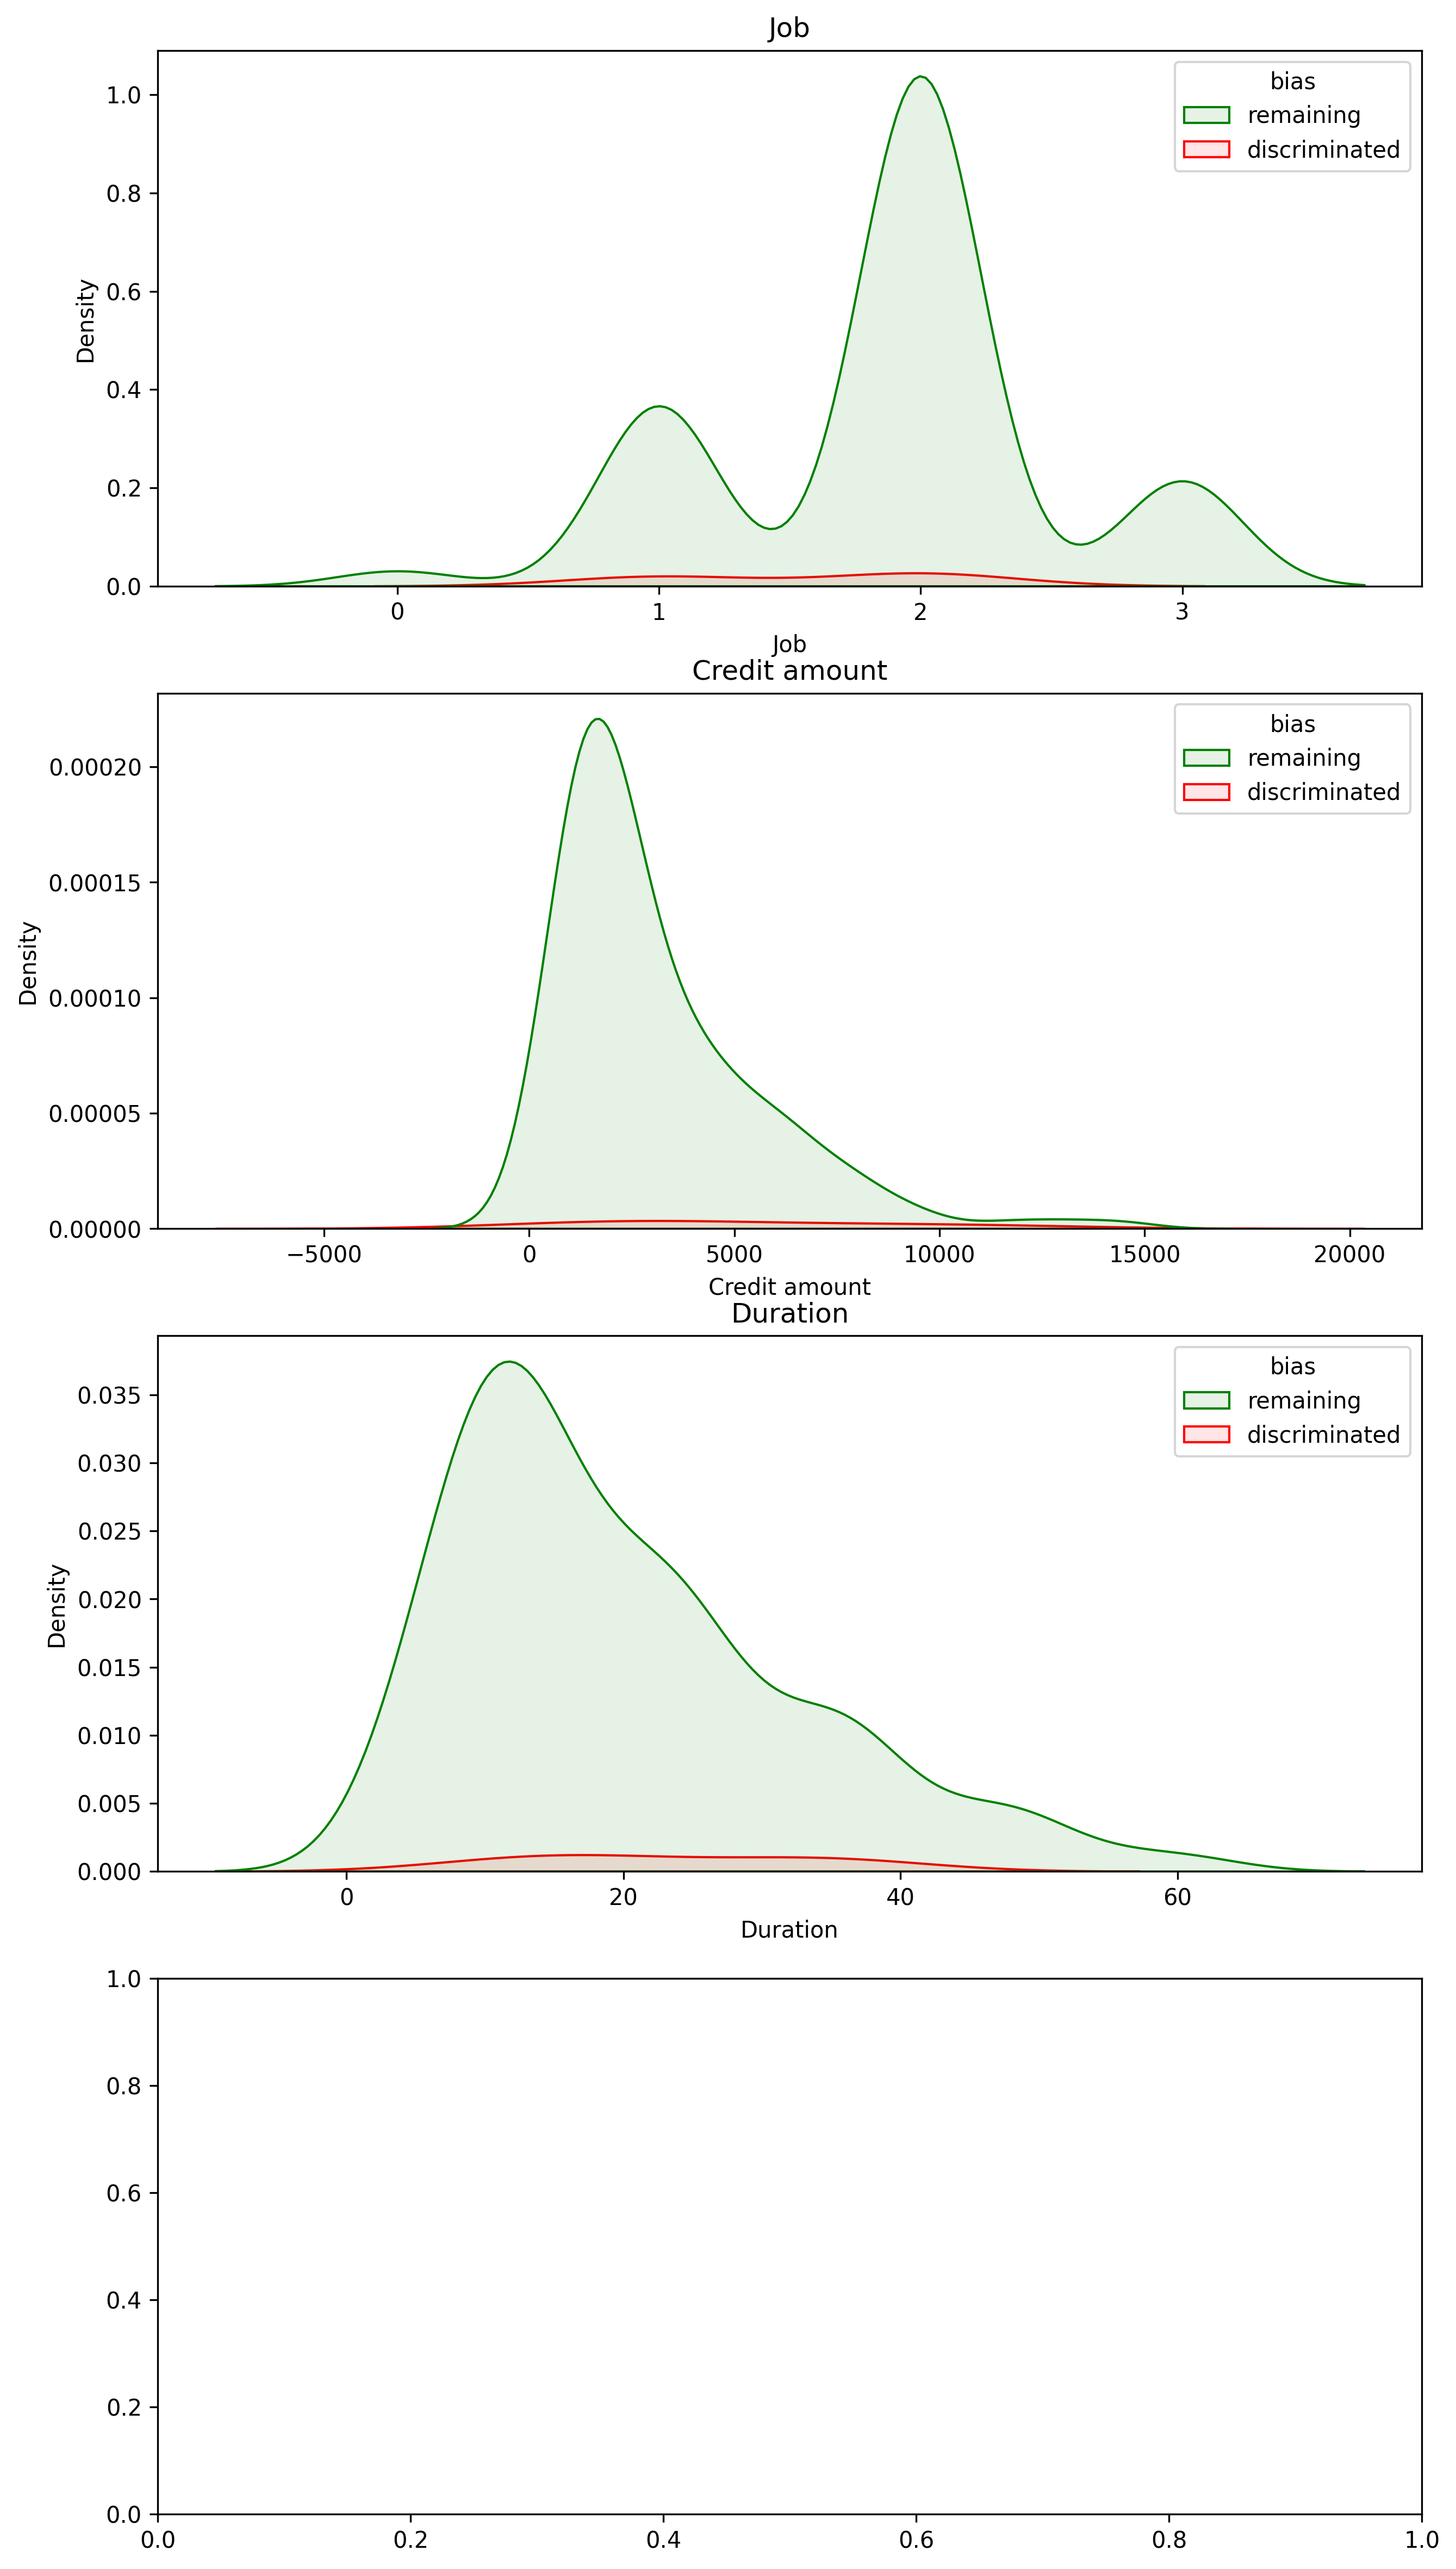

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,20))
# creating a dictionary with one specific color per group:
my_pal = {"remaining": "g", "discriminated": "r"}

i = 0
for col in raw_data.columns:
    sns.kdeplot(data=raw_data, x=col, shade=True, hue="bias", multiple='layer', ax=ax[i], palette=my_pal, alpha=0.1) # axis tweedimenionaal. Dus doorlopen met mod van i en / 5 naar beneden afgerond.
    ax[i].set_title(col, fontsize=12) # title niet overlappen, Grootte zelf bepalen. Maar 1 legenda 
    i += 1
    print(i) # dit en alles er onder moet uiteindelijk weg
    if i >= 5: 
        break

plt.tight_layout()

plt.show()


In [8]:
sns.kdeplot(data=df_plot, x='Age', shade=True, hue="bias", multiple='layer', ax=ax[i], palette=my_pal, alpha=0.1)

NameError: name 'df_plot' is not defined

In [ ]:
for i in df_plot.columns:
    sns.kdeplot(data=df_all, x=i, hue='bias', bins=20)

    plt.show()

Text(0.5, 1.0, 'HBAC-DBSCAN Density Distribution of Age')

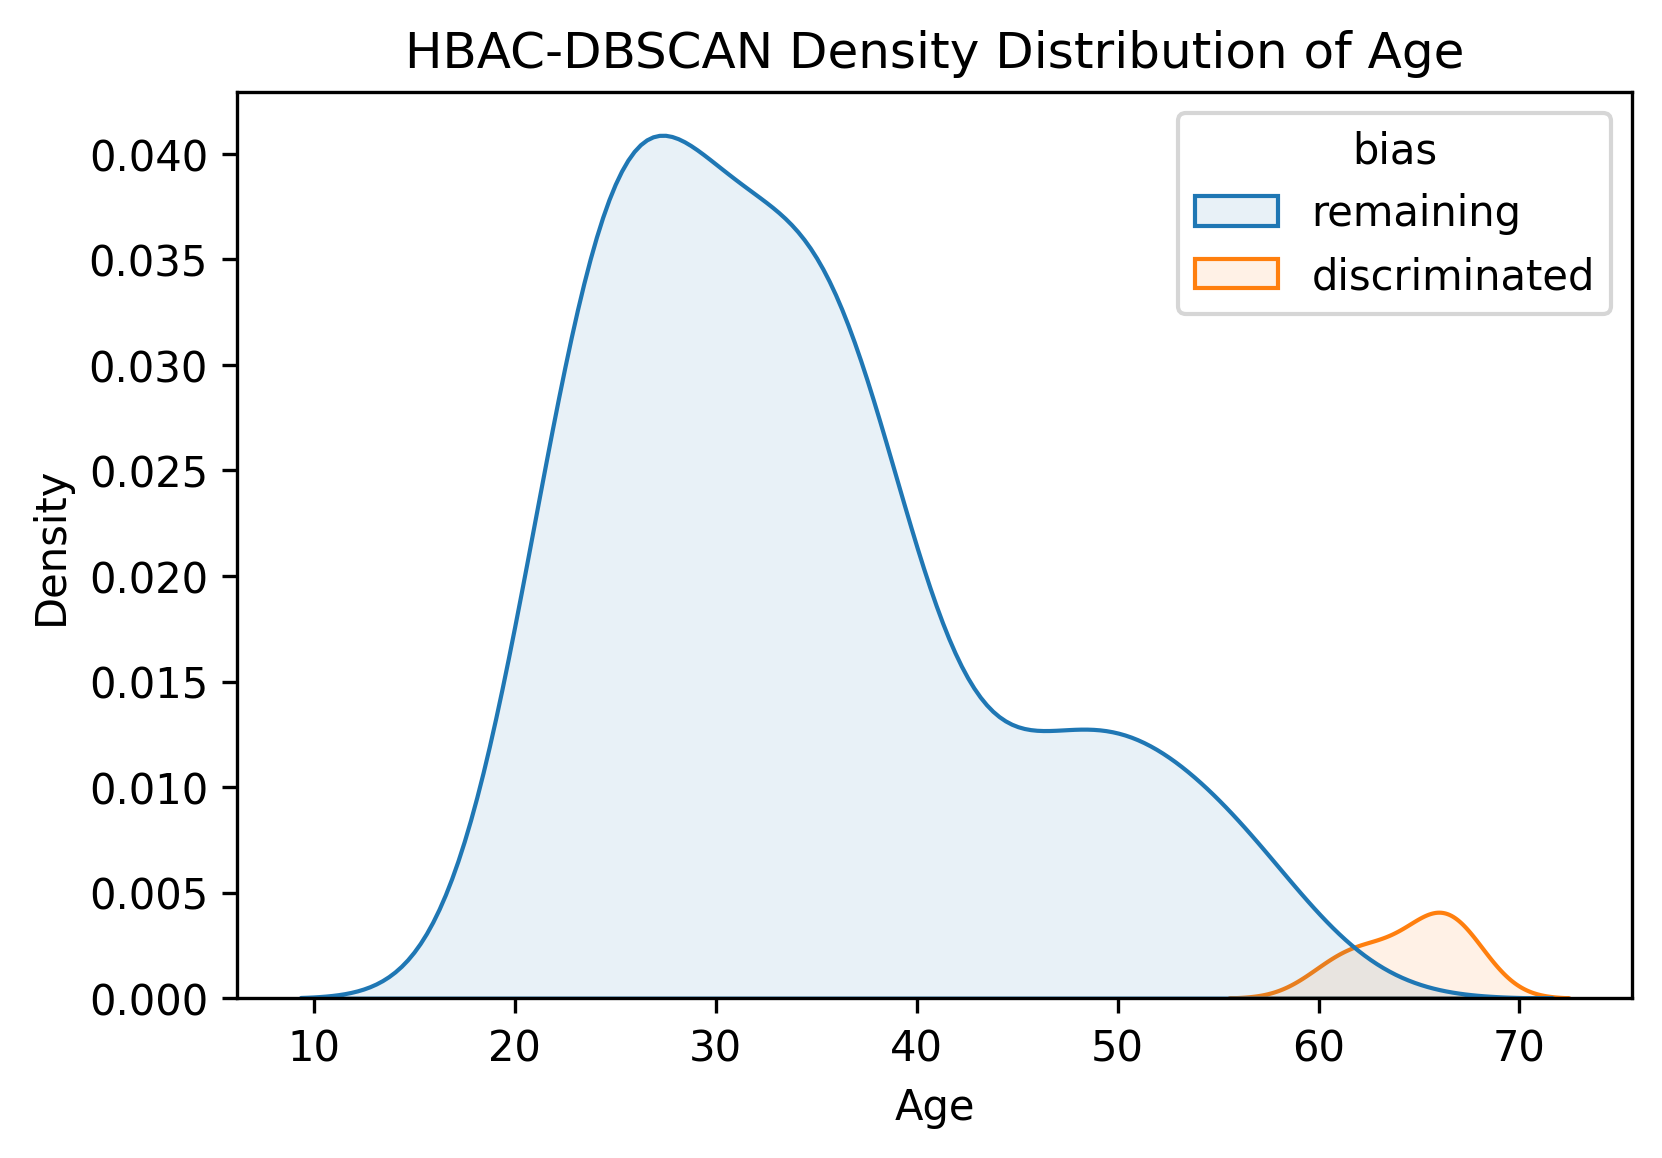

In [29]:
one_plot = sns.kdeplot(data=df_plot, x='Age', shade=True, hue="bias", multiple='layer', alpha=0.1)
one_plot.set_title('HBAC-DBSCAN Density Distribution of Age')